In [1846]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df = pd.read_csv("SPY.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] > '2016-01-01']
#df = df.reset_index(inplace = True)
df = df.reset_index(drop = True)
#df.set_index('Date', inplace=True)

In [1847]:

df
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
window = 14
avg_gain = gain.rolling(window=window, min_periods=1).mean()
avg_loss = loss.rolling(window=window, min_periods=1).mean()
RS = avg_gain / avg_loss
RSI = 100 - (100 / (1 + RS))
df['RSI14'] = RSI
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
window = 7
avg_gain = gain.rolling(window=window, min_periods=1).mean()
avg_loss = loss.rolling(window=window, min_periods=1).mean()
RS = avg_gain / avg_loss
RSI = 100 - (100 / (1 + RS))
df['RSI7'] = RSI
indices_to_drop = df.index[:20]
df = df.drop(indices_to_drop).reset_index(drop=True)



In [1848]:
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month_of_Year'] = df['Date'].dt.month

In [1849]:
df2 = pd.read_csv("^VIX.csv")
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2[['Date', 'Close']]
df2 = df2.rename(columns={'Close':'VIX_Close'})
df3 = pd.read_csv("^TNX.csv")
df3['Date'] = pd.to_datetime(df3['Date'])
df3 = df3[['Date', 'Close']]
df3 = df3.rename(columns={'Close':'TNX_Close'})
df4 = pd.read_csv("^TYX.csv")
df4['Date'] = pd.to_datetime(df4['Date'])
df4 = df4[['Date', 'Close']]
df4 = df4.rename(columns={'Close':'TYX_Close'})
merged_df = pd.merge(df2, df3, on='Date', how='inner')
merged_df1 = pd.merge(merged_df, df4, on='Date', how='inner')

In [1850]:
df = pd.merge(df, merged_df1, on='Date',how='left')

In [1851]:
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume,RSI14,RSI7,Day_of_Week,Month_of_Year,VIX_Close,TNX_Close,TYX_Close
0,2016-02-02,191.960007,191.970001,189.539993,190.160004,164.640625,182564900,45.171080,48.919567,Tuesday,2,21.980000,1.864,2.679
1,2016-02-03,191.410004,191.779999,187.100006,191.300003,165.627640,205054900,53.794166,62.265444,Wednesday,2,21.650000,1.881,2.705
2,2016-02-04,190.710007,192.750000,189.960007,191.600006,165.887375,139531800,49.445400,55.529267,Thursday,2,21.840000,1.864,2.700
3,2016-02-05,190.990005,191.669998,187.199997,187.949997,162.727219,180788300,50.239069,49.367950,Friday,2,23.379999,1.848,2.682
4,2016-02-08,185.770004,186.119995,182.800003,185.419998,160.536697,191526700,45.817492,38.315385,Monday,2,26.000000,1.735,2.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,2024-04-19,499.440002,500.459991,493.859985,495.160004,495.160004,102129100,22.107396,14.520976,Friday,4,18.709999,4.615,4.711
2068,2024-04-22,497.829987,502.380005,495.429993,499.720001,499.720001,67961000,30.741281,16.642329,Monday,4,16.940001,4.623,4.724
2069,2024-04-23,501.779999,506.089996,499.529999,505.649994,505.649994,64633600,37.490921,40.068729,Tuesday,4,15.690000,4.598,4.723
2070,2024-04-24,506.559998,507.369995,503.130005,505.410004,505.410004,55928100,42.167685,52.397584,Wednesday,4,15.970000,4.652,4.784


In [1852]:
df.replace(0, np.nan, inplace=True)
df = df.dropna()
df = df.reset_index(drop = True)
df['Day_of_Week'] = df['Day_of_Week'].astype('category').cat.codes
split_idx = int(len(df) * .85)
df['Date'] = df['Date'].astype('category').cat.codes
scaler = MinMaxScaler()
features = ['Close','Date', 'Open', 'High', 'Low', 'Volume', 'RSI14', 'RSI7', 'Day_of_Week', 'Month_of_Year', 'VIX_Close', 'TNX_Close', 'TYX_Close']
display(df)
df[features] = scaler.fit_transform(df[features])
df = df[['Close','Date', 'Open', 'High', 'Low', 'Volume', 'RSI14', 'RSI7', 'Day_of_Week', 'Month_of_Year', 'VIX_Close', 'TNX_Close', 'TYX_Close']]
train = df[:split_idx]
test = df[split_idx:]

,Date,Open,High,Low,Close,Adj Close,Volume,RSI14,RSI7,Day_of_Week,Month_of_Year,VIX_Close,TNX_Close,TYX_Close
0,0,191.960007,191.970001,189.539993,190.160004,164.640625,182564900,45.171080,48.919567,3,2,21.980000,1.864,2.679
1,1,191.410004,191.779999,187.100006,191.300003,165.627640,205054900,53.794166,62.265444,4,2,21.650000,1.881,2.705
2,2,190.710007,192.750000,189.960007,191.600006,165.887375,139531800,49.445400,55.529267,2,2,21.840000,1.864,2.700
3,3,190.990005,191.669998,187.199997,187.949997,162.727219,180788300,50.239069,49.367950,0,2,23.379999,1.848,2.682
4,4,185.770004,186.119995,182.800003,185.419998,160.536697,191526700,45.817492,38.315385,1,2,26.000000,1.735,2.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,2063,499.440002,500.459991,493.859985,495.160004,495.160004,102129100,22.107396,14.520976,0,4,18.709999,4.615,4.711
2064,2064,497.829987,502.380005,495.429993,499.720001,499.720001,67961000,30.741281,16.642329,1,4,16.940001,4.623,4.724
2065,2065,501.779999,506.089996,499.529999,505.649994,505.649994,64633600,37.490921,40.068729,3,4,15.690000,4.598,4.723
2066,2066,506.559998,507.369995,503.130005,505.410004,505.410004,55928100,42.167685,52.397584,4,4,15.970000,4.652,4.784


In [1853]:
def to_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data[features].iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]['Close']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [1854]:
seq_length = 4 
train_X, train_y = to_sequences(train, seq_length)
test_X, test_y = to_sequences(test, seq_length)
train_X.shape

(1753, 4, 13)

In [1855]:
import torch
from torch.utils.data import TensorDataset, DataLoader
X_torch = torch.tensor(train_X, dtype=torch.float32)
y_torch = torch.tensor(train_y, dtype=torch.float32).view(-1, 1)
train_data = TensorDataset(X_torch, y_torch)
train_loader = DataLoader(train_data, batch_size=512, shuffle=False)

In [1856]:
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input, hl, out):
        super(StockLSTM, self).__init__()
        self.hl = hl
        self.lstm = nn.LSTM(input, hl, batch_first=True)
        self.linear = nn.Linear(hl, out)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions

input = len(features)
hl = 50
out = 1

model = StockLSTM(input_size, hidden_layer_size, output_size)


In [1857]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

epochs = 50
for epoch in range(epochs):
    for seqs, labels in train_loader:
        optimizer.zero_grad()
        y_pred = model(seqs)
        loss = criterion(y_pred, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1} Loss: {loss.item()}')

Epoch 1 Loss: 0.20667500793933868
Epoch 2 Loss: 0.0944758877158165
Epoch 3 Loss: 0.027863759547472
Epoch 4 Loss: 0.006919142324477434
Epoch 5 Loss: 0.005067972932010889
Epoch 6 Loss: 0.00870313961058855
Epoch 7 Loss: 0.015100417658686638
Epoch 8 Loss: 0.01811215840280056
Epoch 9 Loss: 0.014630716294050217
Epoch 10 Loss: 0.00741784879937768
Epoch 11 Loss: 0.0022608651779592037
Epoch 12 Loss: 0.0011328887194395065
Epoch 13 Loss: 0.0009028981439769268
Epoch 14 Loss: 0.0009558613528497517
Epoch 15 Loss: 0.0008003636030480266
Epoch 16 Loss: 0.0019473072607070208
Epoch 17 Loss: 0.0018375904764980078
Epoch 18 Loss: 0.0009836287936195731
Epoch 19 Loss: 0.0010378031292930245
Epoch 20 Loss: 0.0011465458665043116
Epoch 21 Loss: 0.0007533376920036972
Epoch 22 Loss: 0.0006222592783160508
Epoch 23 Loss: 0.0006761414697393775
Epoch 24 Loss: 0.0007139634690247476
Epoch 25 Loss: 0.0006454347749240696
Epoch 26 Loss: 0.0006407278124243021
Epoch 27 Loss: 0.0007054927991703153
Epoch 28 Loss: 0.000706156482

Mean Squared Error: 0.0003118186432402581
Mean Absolute Error: 0.014344066381454468


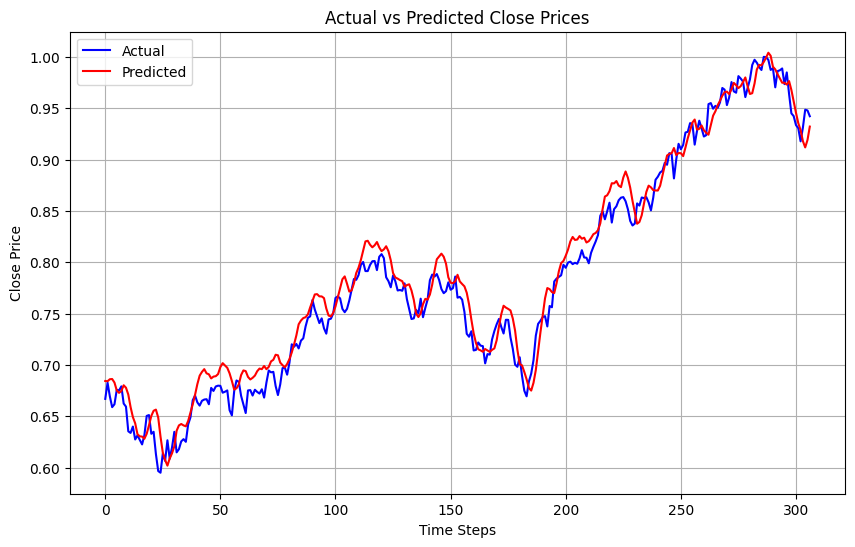

In [1858]:
X_test_torch = torch.tensor(test_X, dtype=torch.float32)
y_test_torch = torch.tensor(test_y, dtype=torch.float32).view(-1, 1)

test_data = TensorDataset(X_test_torch, y_test_torch)
test_loader = DataLoader(test_data, batch_size=512, shuffle=False)
from sklearn.metrics import mean_squared_error, mean_absolute_error

model.eval()  
predictions = []
actuals = []

with torch.no_grad():
    for seqs, labels in test_loader:
        output = model(seqs)
        predictions.extend(output.numpy().flatten())  # Store predictions
        actuals.extend(labels.numpy().flatten())  # Store actual values

mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
import matplotlib.pyplot as plt

def calculate_ema(values, period, smoothing=None):
    if smoothing is None:
        smoothing = 2 / (period + 1)  
    ema = [values[0]]  
    for value in values[1:]:
        new_ema = (value * smoothing) + (ema[-1] * (1 - smoothing))
        ema.append(new_ema)
    return ema

ema = calculate_ema(predictions,10)
act_ema = calculate_ema(actuals,10)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actuals[:], label='Actual', color='blue')
plt.plot(predictions[:], label='Predicted', color='red')
plt.grid(2)
#plt.plot(ema[100:], label='Predicted EMA', color='green')
#plt.plot(act_ema[100:], label='Actual EMA', color='purple')

plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()